In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [63]:
data_1 = r"C:\Users\danie\Downloads\Benavente.csv"
data_2 = r"C:\Users\danie\Downloads\Cartaxo.csv"
data_3 = r"C:\Users\danie\Downloads\Almeirim.csv"

df_Benavente = pd.read_csv(data_1)
df_Cartaxo = pd.read_csv(data_2)
df_Almeirim = pd.read_csv(data_3)

In [16]:
df_Almeirim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    396 non-null    object 
 1   output  396 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [21]:
df_Cartaxo.head(2)


,date,output
0,85-01,60.421000
1,85-02,59.042242


In [20]:
df_Almeirim['date'] = pd.to_datetime(df_Almeirim['date'], format = '%y-%m')
df_Benavente['date'] = pd.to_datetime(df_Benavente['date'], format = '%b,%Y')

In [11]:
df_Almeirim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    396 non-null    datetime64[ns]
 1   output  396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [82]:
class Wine:
    def __init__(self, filename, label):
        self.filename = filename
        self.label = label

        if not os.path.exists(filename):
            raise FileNotFoundError(f"File Not Found{filename}")

        self.df = pd.read_csv(filename)

        try:
            self.df['date'] = pd.to_datetime(self.df['date'], format = '%y-%m')
        except:
            try:
                self.df['date'] = pd.to_datetime(self.df['date'], format = '%b,%Y')
            except:
                self.df['date'] = pd.to_datetime(self.df['date'], format = '%y-%m')

    def report(self, start_date:str = '1990-01-01', end_date:str = '2018-01-01'):
        if not isinstance(start_date, str) or not isinstance(end_date, str):
            raise TypeError(f"TypeError: Both temporal arguments must be strings")

        if len(start_date) != 10 or len(end_date) != 10:
            raise Exception(f"ERROR: Both arguments must have length 10")

        try:
            start_date = pd.to_datetime(start_date)
        except:
            raise Exception("Can't convert start_end to temportal format")

        try:
            end_date = pd.to_datetime(end_date)
        except:
            raise Exception("Can't convert start_end to temportal format")

        filtered_df = self.df[(self.df['date'] >= start_date) &  (self.df['date'] <= end_date)]
        print(f"{self.label} Wine Report")
        print(25 * "_")
        print(filtered_df.describe())

    def forecast(self, start_date = '2018-01-01', periods = 24):
        mod = sm.tsa.statespace.SARIMAX(self.df['output'], order = (2,1,1), seasonal_order=(1,1,1,12))
        res = mod.fit()

        output_hat = res.predict(start = len(self.df), end = len(self.df) + (periods - 1))
        time_hat = pd.date_range(start = start_date, periods = periods, freq = 'MS')

        df_pred = pd.DataFrame({'date': time_hat, 'output':output_hat})

        plt.figure(figsize = (10,5))
        plt.plot(self.df['date'], self.df['output'], label = 'Actual Output')
        plt.plot(df_pred['date'], df_pred['output'], label = 'Forecasted Output')
        plt.legend()
        plt.title("Output Forecast")
        plt.xlabel("Date")
        plt.ylabel("Output")
        plt.show()

Cartaxo Wine Report
_________________________
                      date      output
count                  120  120.000000
mean   2004-12-15 18:00:00  149.081086
min    2000-01-01 00:00:00  107.737413
25%    2002-06-23 12:00:00  132.461539
50%    2004-12-16 12:00:00  149.450935
75%    2007-06-08 12:00:00  166.179004
max    2009-12-01 00:00:00  201.478918
std                    NaN   21.729269


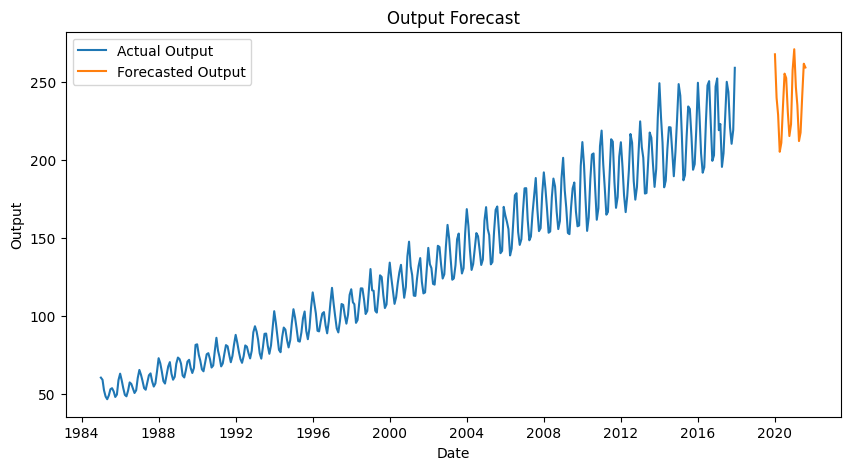

In [84]:
wine_data = Wine(r"C:\Users\danie\Downloads\Cartaxo.csv", "Cartaxo")
start_date = str("2000-01-01")
end_date = str("2009-12-31")
forecast_date = str("2020-01-01")

wine_data.report(start_date, end_date)
wine_data.forecast(forecast_date, 20)